## Import Packages and Read Data

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/erica/Desktop/Y3S2/DSE3101/Local/reslae_price_normalized_for_ML.csv')

## Clean and Normalize Data

In [8]:
df = df.drop(columns=['flat_model', 'building_age_2025', 'total_unemployment_rate', 
                      'Chinese', 'Malays', 'Indians', 'Others', 'fx_rate'])
df_normalized_clean = df.copy()

def normalize(col):
    return (col - col.min()) / (col.max() - col.min()) if col.max() != col.min() else col

df_normalized_clean['month'] = pd.to_datetime(df_normalized_clean['month'])
df_normalized_clean['year'] = df_normalized_clean['month'].dt.year.astype(float)
df_normalized_clean['month_num'] = df_normalized_clean['month'].dt.month.astype(float)
df_normalized_clean = df_normalized_clean.drop(columns=['month'])
df_normalized_clean = df_normalized_clean.drop(columns = ['CPI (base 2024-12)'])

columns_to_normalize = ['inflation_rate (x100)', 'interest_rate', 'priv_prop',
                        'resident_unemployment_rate', 'month_num', 'year']

df_normalized_clean[columns_to_normalize] = df_normalized_clean[columns_to_normalize].apply(normalize)

In [9]:
df_normalized_clean.dropna(subset = ['resale_price'], inplace = True)
X = df_normalized_clean.drop(columns=['resale_price'])
y = df_normalized_clean['resale_price']

In [10]:
categorical_features = ['town']
numerical_features = [
    'storey_range', 'remaining_lease',
    'lat', 'lon', 'nearest_mrt_distance', 'nearest_bus_distance',
    'education_score', 'shopping_score', 'food_score', 'recreation_score',
    'healthcare_score', 'inflation_rate (x100)',
    'resident_unemployment_rate',
    'interest_rate', 'avg_household_income', 'priv_prop', 'flat_type'
]
numerical_features.extend(['year', 'month_num'])

In [11]:
demographic_features = [
    'NoReligion', 'Buddhism', 'Taoism1', 'Islam', 'Hinduism', 'Sikhism',
    'Christianity_Catholic', 'Christianity_OtherChristians', 'OtherReligions'
]
numerical_features.extend(demographic_features)  # Add to numerical pipeline

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

## Fit Random Forest Regression

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['storey_range',
                                                   'remaining_lease', 'lat',
                                                   'lon',
                                                   'nearest_mrt_distance',
                                                   'nearest_bus_distance',
                                                   'education_score',
                                                   'shopping_score',
                                                   'food_score',
                                                   'recreation_score',
                                                   'healthcare_score',
                                                   'inflation_rate (x100)',
                                                   'resident_unemployment_rate',
                                                   'interest_rate',
                                                   'avg_household_income',
                                                   'priv_prop', 'flat_type',
                                                   'year', 'month_num',
                                                   'NoReligion', 'Buddhism',
                                                   'Taoism1', 'Islam',
                                                   'Hinduism', 'Sikhism',
                                                   'Christianity_Catholic',
                                                   'Christianity_OtherChristians',
                                                   'OtherReligions']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['town'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [15]:
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 0.01614763232329515
Mean Squared Error: 0.0005318769780041245
R² Score: 0.9678227413650742


## Visualization

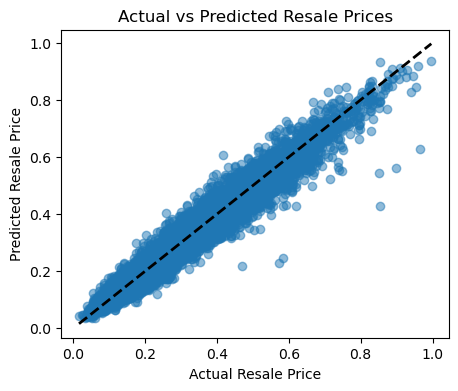

In [16]:
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()